In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# !pip install outlier_utils

In [22]:
df = pd.read_csv('./S1Data.csv')
df.head()

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,0,97,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,0,180,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,1,31,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,0,87,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,0,113,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [27]:
df_survive = df.loc[df['Event'] == 1]
df_dead = df.loc[df['Event'] == 0]

In [3]:
df.describe()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
count,299.000000,299.00000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,130.260870,0.32107,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,77.614208,0.46767,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,4.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,73.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,115.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,203.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,285.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


In [5]:
df.isnull().sum()

TIME                 0
Event                0
Gender               0
Smoking              0
Diabetes             0
BP                   0
Anaemia              0
Age                  0
Ejection.Fraction    0
Sodium               0
Creatinine           0
Pletelets            0
CPK                  0
dtype: int64

In [3]:
threshold_unique_value = 10
def get_continuous_feature(df):
    continuous_feature_list = []
    for feature in df:
        if len(df[feature].unique()) > threshold_unique_value:
            continuous_feature_list.append(feature)
    return continuous_feature_list

def get_cat_feature(df):
    cat_feature_list = []
    for feature in df:
        if len(df[feature].unique()) <= threshold_unique_value:
            cat_feature_list.append(feature)
    return cat_feature_list

continuous_feature_list = get_continuous_feature(df)
cat_feature_list = get_cat_feature(df)

<Figure size 432x288 with 0 Axes>

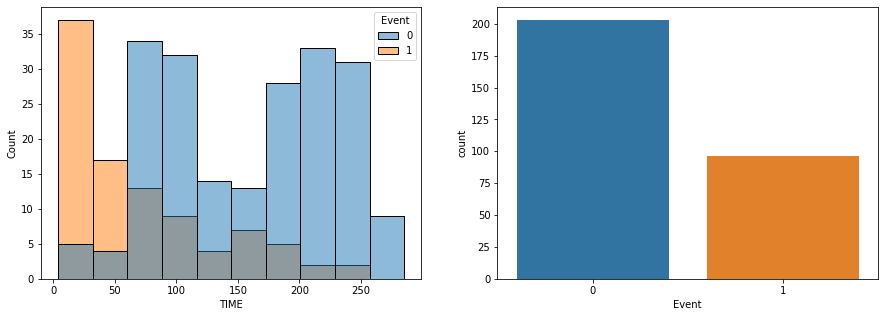

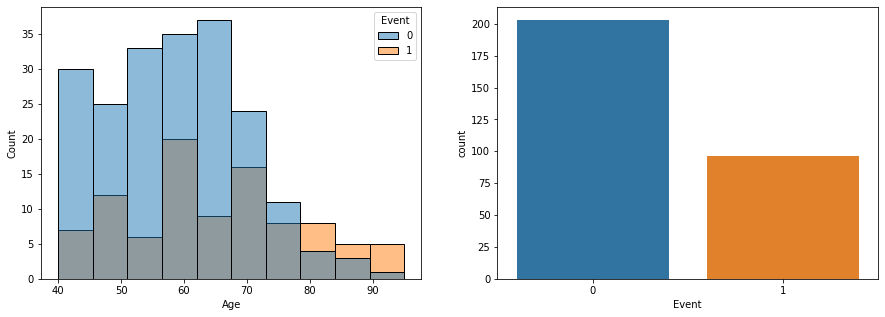

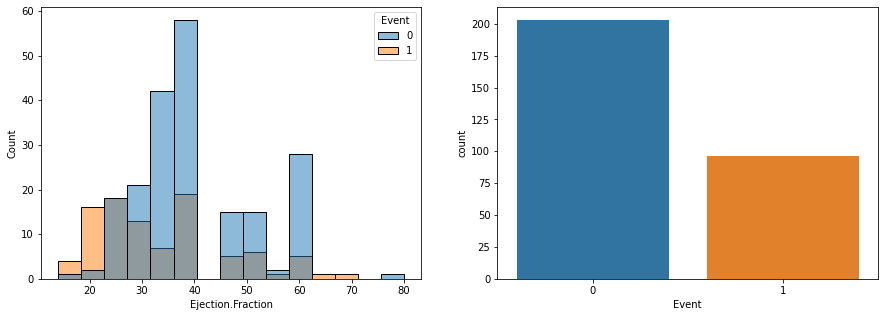

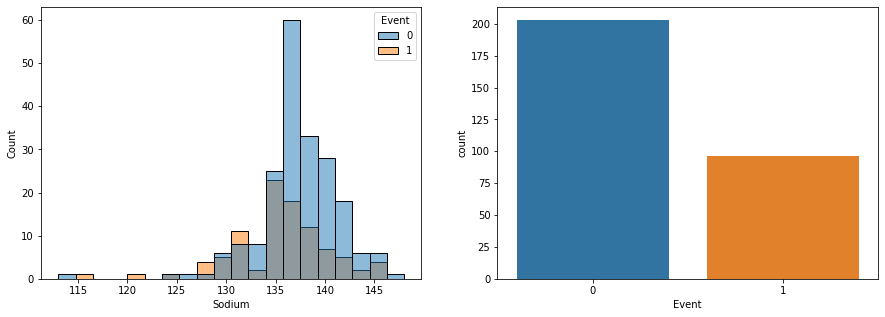

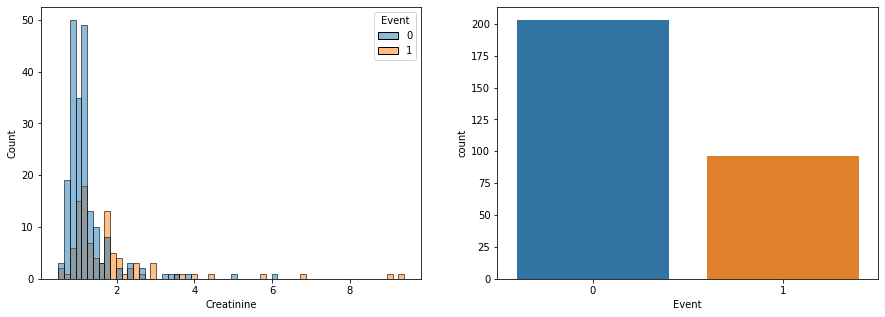

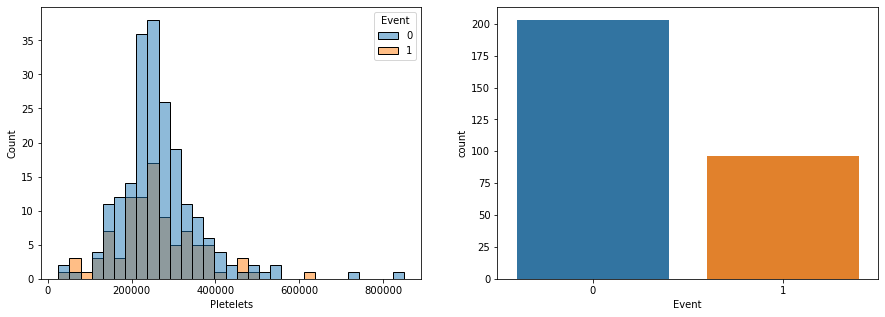

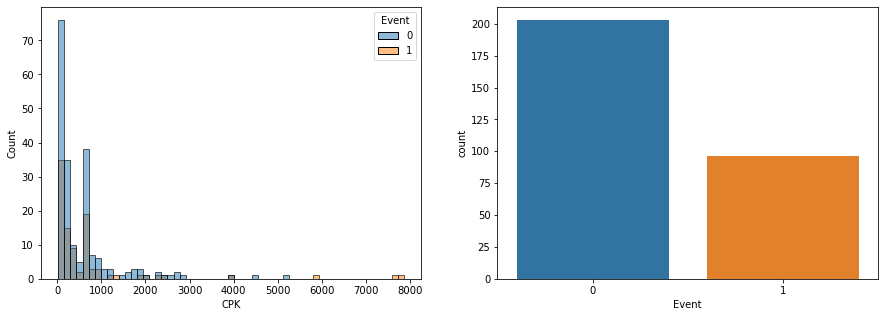

In [169]:
def plt_histogram(df, feature_list):
    for i, feature in enumerate(feature_list):
        plt.figure(i)
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        sns.histplot(x=feature, hue="Event", data = df, ax = axes[0])
        sns.countplot(x="Event",  data = df,  ax = axes[1])
plt_histogram(df,continuous_feature_list)

<Figure size 432x288 with 0 Axes>

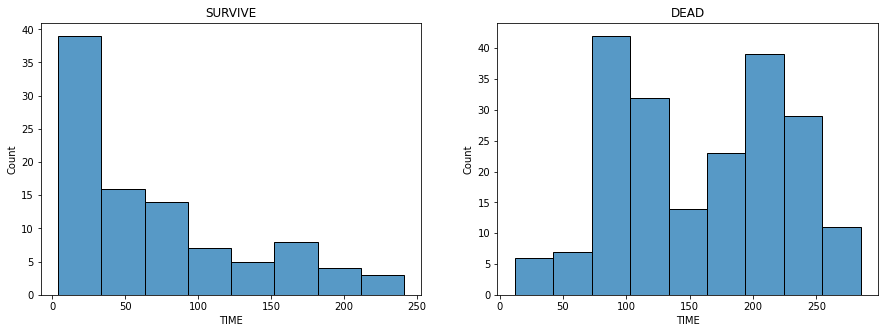

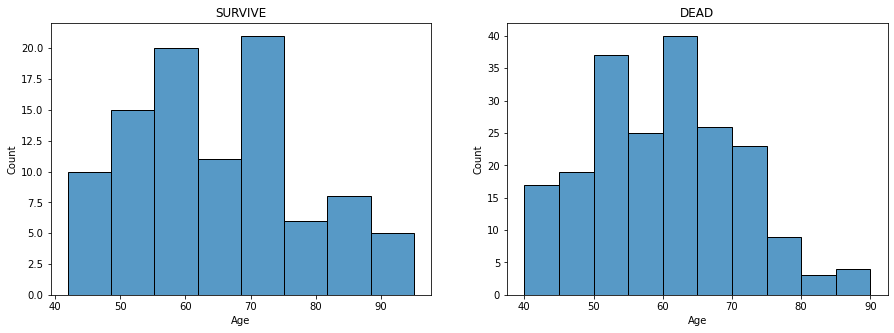

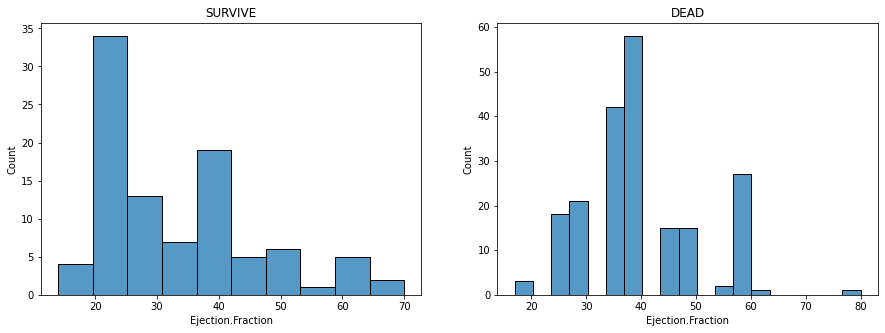

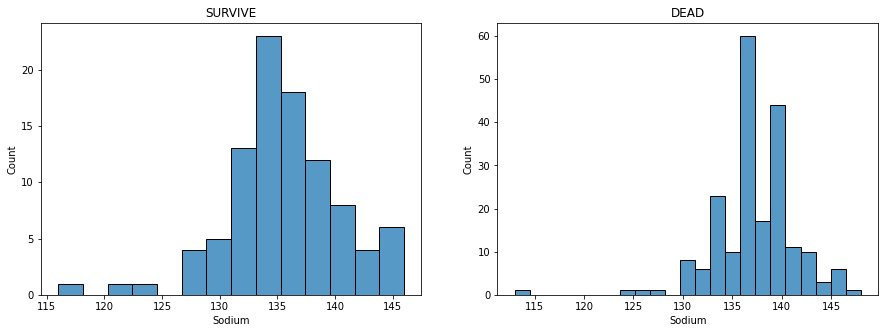

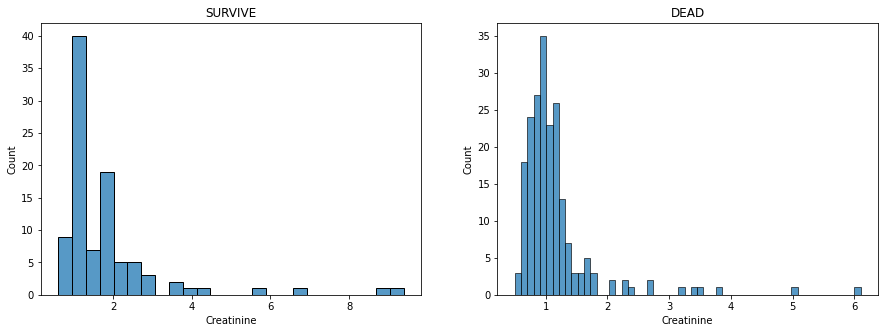

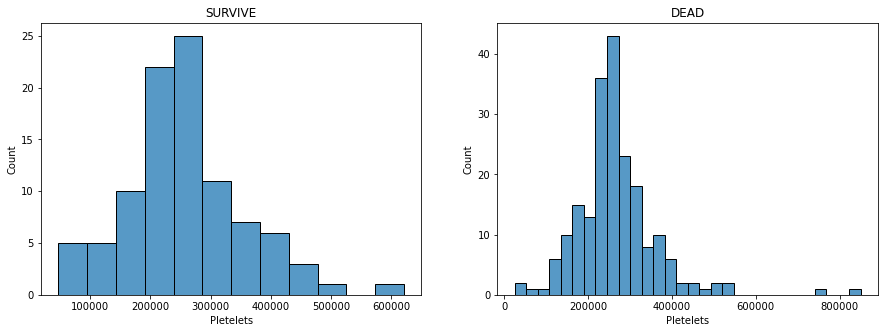

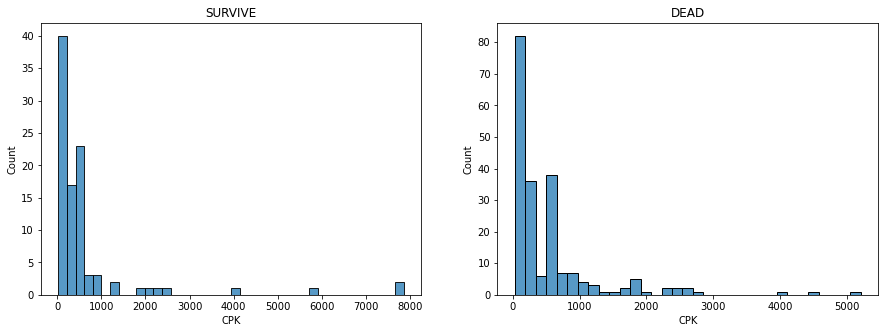

In [7]:
def plt_histogram_each_target(feature_list):
    for i, feature in enumerate(feature_list):
        plt.figure(i)
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        sns.histplot(x=feature, data = df_survive, ax = axes[0]).set_title('SURVIVE')
        sns.histplot(x=feature, data = df_dead, ax = axes[1]).set_title('DEAD')
plt_histogram_each_target(continuous_feature_list)

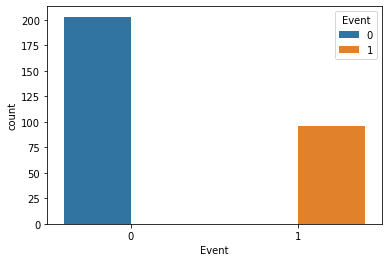

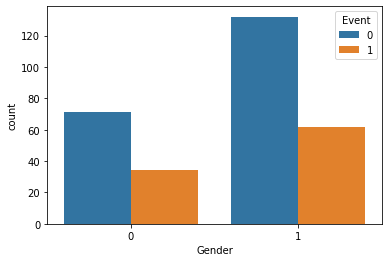

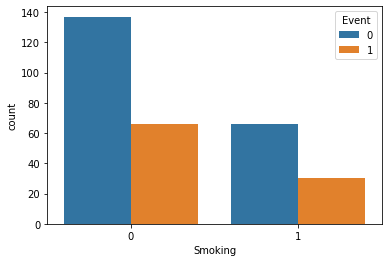

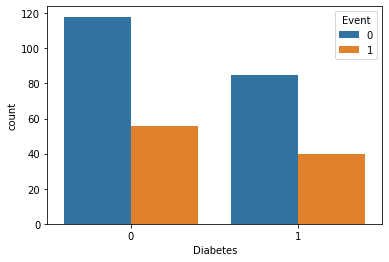

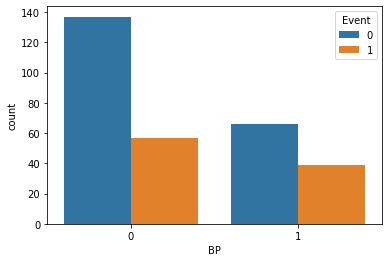

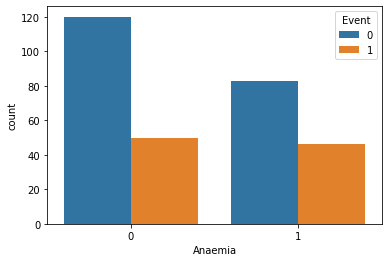

In [13]:
def plt_count_each_target(feature_list):
    for i, feature in enumerate(feature_list):
        plt.figure(i)
        sns.countplot(x=feature, data = df, hue="Event")
plt_count_each_target(cat_feature_list)

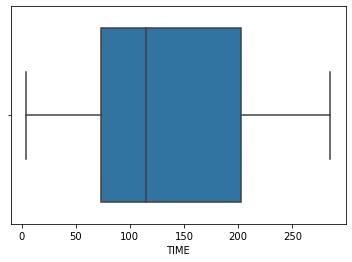

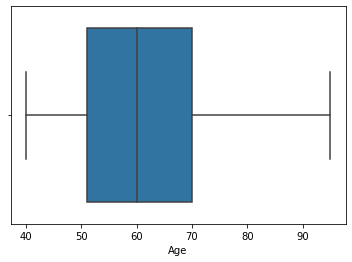

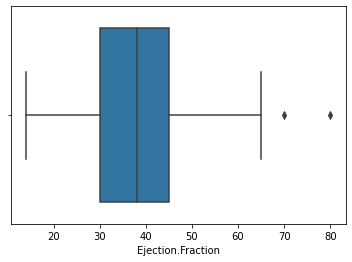

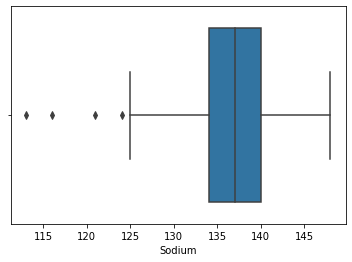

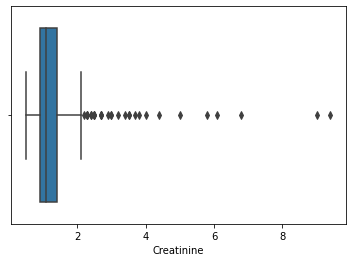

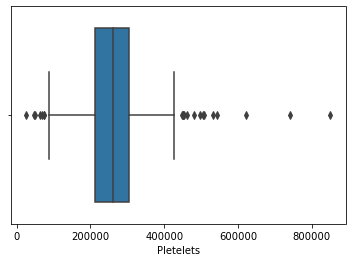

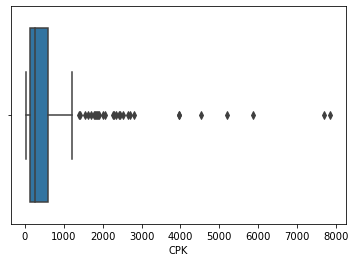

In [35]:
def plt_boxplot(df, feature_list):
    for i, feature in enumerate(feature_list):
        plt.figure(i)
        sns.boxplot(x=feature, data = df)
plt_boxplot(df,continuous_feature_list)

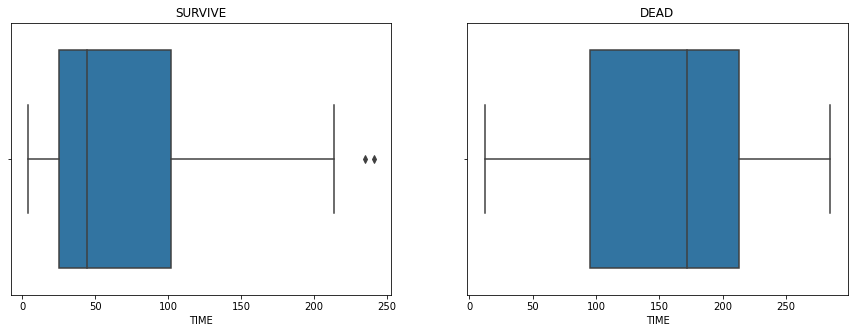

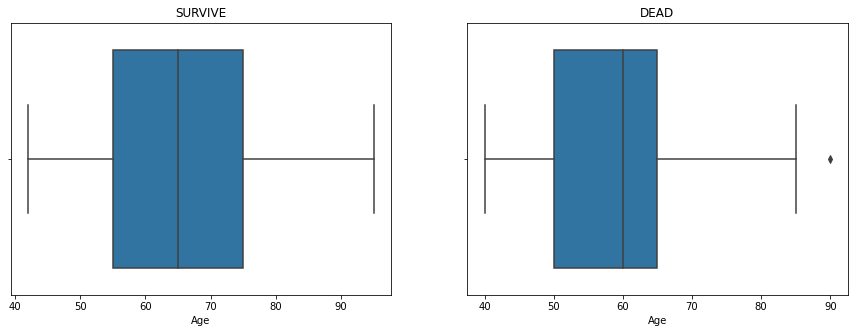

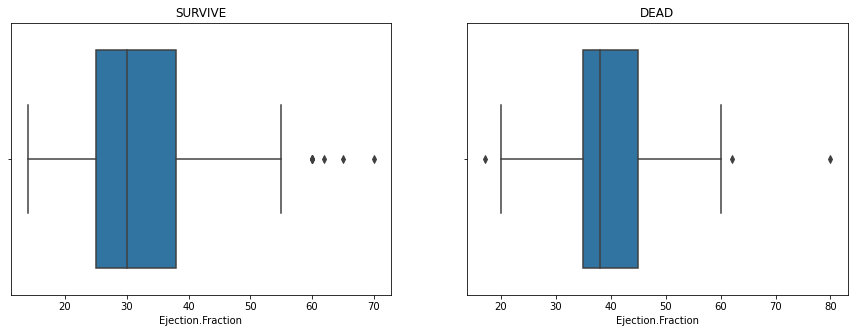

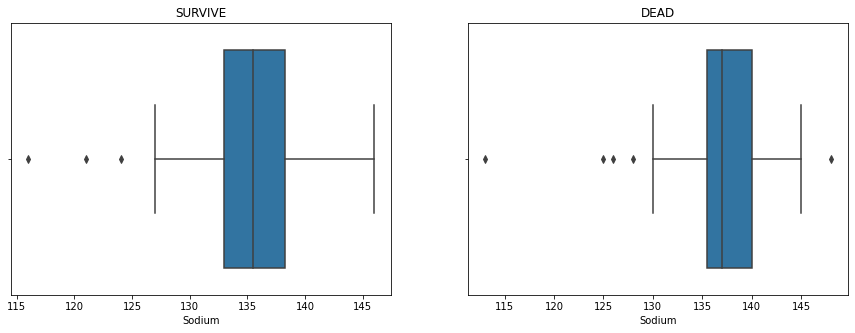

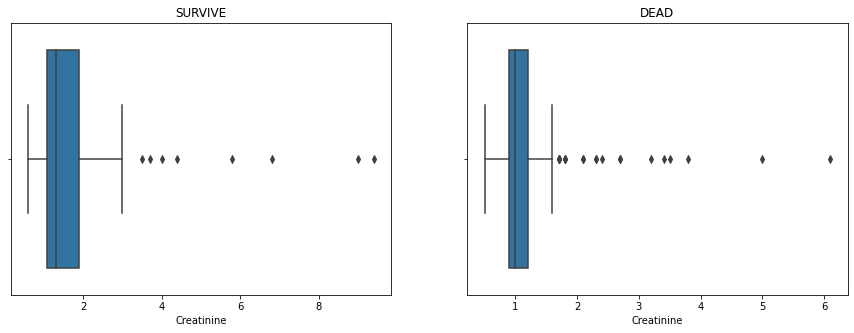

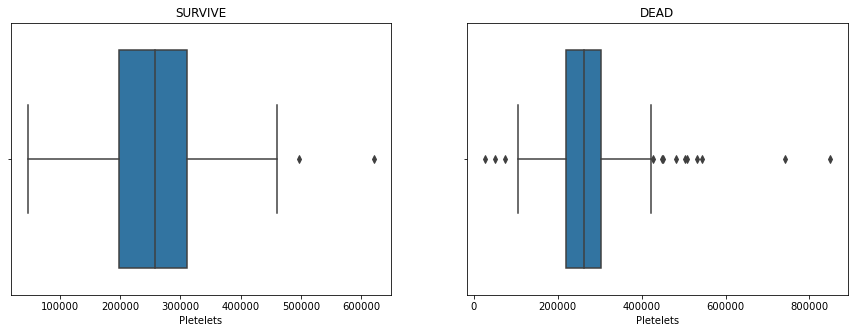

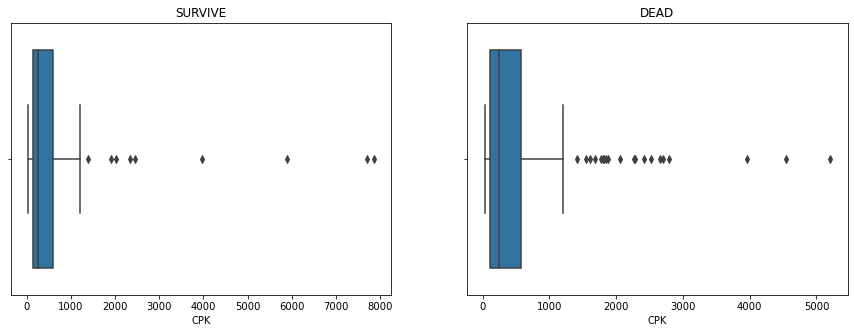

In [15]:
def plt_boxplot_each_target(feature_list):
    for i, feature in enumerate(feature_list):
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        sns.boxplot(x=feature, data = df_survive, ax = axes[0]).set_title('SURVIVE')
        sns.boxplot(x=feature, data = df_dead, ax = axes[1]).set_title('DEAD')
plt_boxplot_each_target(continuous_feature_list)

In [30]:
sns.boxplot(x=feature, data = df)

['TIME',
 'Age',
 'Ejection.Fraction',
 'Sodium',
 'Creatinine',
 'Pletelets',
 'CPK']

C:\Users\Hp\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


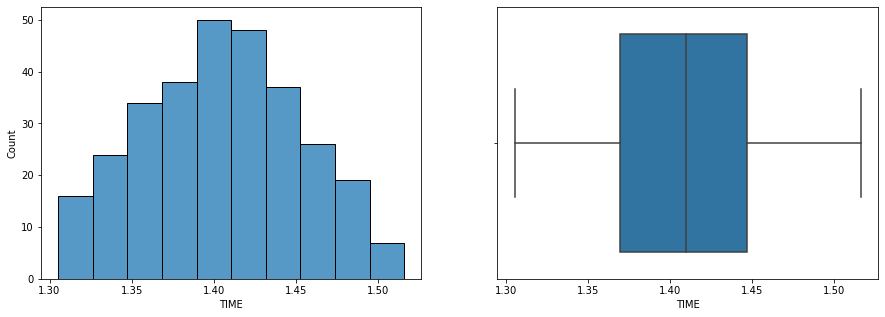

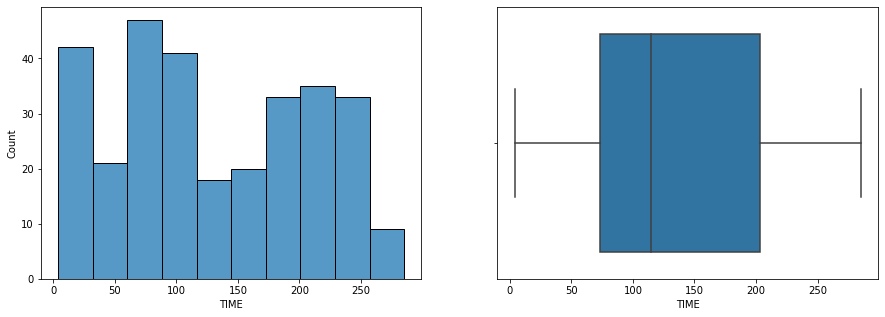

In [79]:
feature = "TIME"
def plot_box_hist(df, feature):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[feature], ax=axes[0])
    sns.boxplot(df[feature], ax=axes[1])
plot_box_hist(test_df,feature)
plot_box_hist(df,feature)

In [68]:
test_df[feature].describe()

count    299.000000
mean       1.407217
std        0.047847
min        1.305323
25%        1.369104
50%        1.409607
75%        1.446565
max        1.515979
Name: Sodium, dtype: float64

In [52]:
# test_df[feature] = test_df.Age**(.5)

In [58]:
# test_df[feature] = 1/ test_df.Age

In [77]:
# test_df[feature] = np.log(test_df.Age)

# Outlier Detection

In [64]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [65]:
df_x = df.copy()
df_x['mahala'] = mahalanobis(x=df_x, data=df)
df_x.head()

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,mahala
0,0,97,0,0,0,0,1,43.0,50,135,1.30,237000.00,358,9.789108
1,0,180,1,1,1,0,1,73.0,30,142,1.18,160000.00,231,12.898874
2,1,31,1,1,0,1,0,70.0,20,134,1.83,263358.03,582,8.943206
3,0,87,1,0,0,0,1,65.0,25,141,1.10,298000.00,305,9.815470
4,0,113,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610,9.266178


In [66]:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

9.21034037197618

In [67]:
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 12)
df_x.head(100)

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,mahala,p_value
0,0,97,0,0,0,0,1,43.0,50,135,1.30,237000.00,358,9.789108,0.634456
1,0,180,1,1,1,0,1,73.0,30,142,1.18,160000.00,231,12.898874,0.376434
2,1,31,1,1,0,1,0,70.0,20,134,1.83,263358.03,582,8.943206,0.707774
3,0,87,1,0,0,0,1,65.0,25,141,1.10,298000.00,305,9.815470,0.632146
4,0,113,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610,9.266178,0.680043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,94,0,0,1,1,1,60.0,60,136,0.70,271000.00,96,9.368462,0.671178
96,0,186,0,0,1,1,1,50.0,20,134,1.00,279000.00,582,11.411442,0.494025
97,1,8,0,0,1,0,1,65.0,20,116,2.70,327000.00,160,29.725806,0.003070
98,1,88,0,1,0,1,1,72.0,30,138,1.70,621000.00,328,26.051903,0.010554


In [68]:
df_x.loc[df_x.p_value < 0.01].head(100)

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,mahala,p_value
25,1,6,1,0,0,0,0,55.0,38,136,1.10,263358.03,7861,61.561744,1.170176e-08
37,0,107,1,0,1,0,1,60.0,45,131,6.10,250000.00,1082,32.169511,1.302824e-03
41,1,60,1,0,1,1,0,45.0,25,139,1.00,390000.00,7702,63.573739,4.997343e-09
82,1,196,0,0,0,1,1,54.0,70,137,9.00,151000.00,427,77.569348,1.197586e-11
97,1,8,0,0,1,0,1,65.0,20,116,2.70,327000.00,160,29.725806,3.070306e-03
104,0,186,1,1,1,0,0,60.0,35,113,1.80,263358.03,1211,36.375481,2.818926e-04
105,1,72,1,1,0,0,0,85.0,35,132,1.00,243000.00,5882,41.809303,3.585746e-05
146,1,10,1,1,0,1,1,80.0,35,133,9.40,388000.00,123,69.941450,3.284827e-10
156,0,107,1,1,0,0,0,81.0,35,137,1.18,231000.00,4540,26.908731,7.964364e-03
201,0,87,1,1,0,0,0,42.0,30,140,1.00,226000.00,5209,30.224073,2.583461e-03


In [69]:
df_x['MultiVariate.Outlier'] = df_x['p_value'].apply(lambda x: 1 if x < 0.01 else 0)

In [9]:
continuous_feature_list_copy = continuous_feature_list.copy()
continuous_feature_list_copy.append("MultiVariate.Outlier")

NameError: name 'continuous_feature_list' is not defined

<AxesSubplot:>

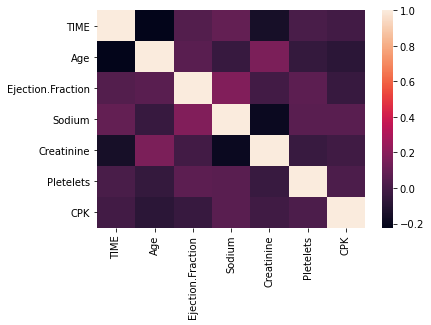

In [32]:
corr=df[continuous_feature_list].corr(method ='pearson')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:>

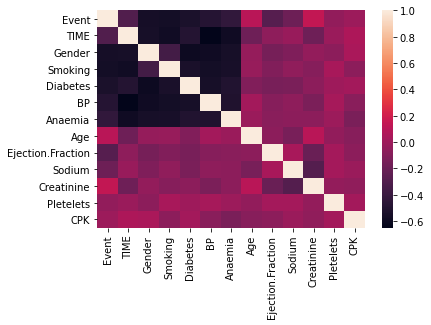

In [34]:
corr=df.corr(method ='kendall')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [72]:
from itertools import repeat
outlier_list_name = []
def outlier_based_IQR(df, feature_name):
#     outlier_list =[]
    percentile25 = df[feature_name].quantile(0.25)
    percentile75 = df[feature_name].quantile(0.75)
    iqr = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[f'Outlier.{feature_name}'] = df[feature_name].apply(lambda x: 1 if ((x < lower_limit) | (x > upper_limit)) else 0)
    return f'Outlier.{feature_name}'

outlier_list_name = [outlier_based_IQR(df_survive, x) for x in continuous_feature_list]
outlier_list_name = [outlier_based_IQR(df_dead, x) for x in continuous_feature_list]
[outlier_based_IQR(df_x, x) for x in continuous_feature_list]
outlier_list_name.append("MultiVariate.Outlier")

C:\Users\Hp\anaconda3\envs\pytorch\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [36]:
df_survive

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,Outlier.TIME,Outlier.Age,Outlier.Ejection.Fraction,Outlier.Sodium,Outlier.Creatinine,Outlier.Pletelets,Outlier.CPK
2,1,31,1,1,0,1,0,70.0,20,134,1.83,263358.03,582,0,0,0,0,0,0,0
5,1,10,1,0,0,0,1,75.0,15,137,1.20,127000.00,246,0,0,0,0,0,0,0
7,1,27,1,0,1,1,0,94.0,38,134,1.83,263358.03,582,0,0,0,0,0,0,0
12,1,13,1,0,0,0,1,82.0,50,136,1.30,47000.00,379,0,0,0,0,0,0,0
13,1,4,1,0,0,1,0,75.0,20,130,1.90,265000.00,582,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,30,0,0,1,0,0,60.0,38,142,3.00,329000.00,235,0,0,0,0,0,0,0
284,1,55,1,1,0,1,0,49.0,20,136,1.10,319000.00,789,0,0,0,0,0,0,0
291,1,15,0,0,0,1,1,70.0,25,140,1.00,237000.00,125,0,0,0,0,0,0,0
292,1,15,0,0,1,0,1,48.0,55,121,1.90,87000.00,582,0,0,0,1,0,0,0


In [90]:
from scipy.stats import shapiro, skewtest
stat, p = shapiro(df_x['TIME'])
# skew = skewtest(df_x['TIME'])
alpha = 0.05
print(p)
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

6.284610609696983e-09
Sample does not look Gaussian (reject H0)


In [70]:
outlier_list_name

['Outlier.TIME',
 'Outlier.Age',
 'Outlier.Ejection.Fraction',
 'Outlier.Sodium',
 'Outlier.Creatinine',
 'Outlier.Pletelets',
 'Outlier.CPK',
 'MultiVariate.Outlier']

In [74]:
df_x['Outlier.Total'] = df_x[outlier_list_name].sum(axis=1)

In [53]:
# outlier_list_name.pop()
df_survive['Outlier.Total'] = df_survive[outlier_list_name].sum(axis=1)
df_dead['Outlier.Total'] = df_dead[outlier_list_name].sum(axis=1)

C:\Users\Hp\anaconda3\envs\pytorch\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [76]:
df_x.loc[df_x['MultiVariate.Outlier'] > 0]

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,mahala,p_value,MultiVariate.Outlier,Outlier.TIME,Outlier.Age,Outlier.Ejection.Fraction,Outlier.Sodium,Outlier.Creatinine,Outlier.Pletelets,Outlier.CPK,Outlier.Total
25,1,6,1,0,0,0,0,55.0,38,136,1.10,263358.03,7861,61.561744,1.170176e-08,1,0,0,0,0,0,0,1,2
37,0,107,1,0,1,0,1,60.0,45,131,6.10,250000.00,1082,32.169511,1.302824e-03,1,0,0,0,0,1,0,0,2
41,1,60,1,0,1,1,0,45.0,25,139,1.00,390000.00,7702,63.573739,4.997343e-09,1,0,0,0,0,0,0,1,2
82,1,196,0,0,0,1,1,54.0,70,137,9.00,151000.00,427,77.569348,1.197586e-11,1,0,0,1,0,1,0,0,3
97,1,8,0,0,1,0,1,65.0,20,116,2.70,327000.00,160,29.725806,3.070306e-03,1,0,0,0,1,1,0,0,3
104,0,186,1,1,1,0,0,60.0,35,113,1.80,263358.03,1211,36.375481,2.818926e-04,1,0,0,0,1,0,0,0,2
105,1,72,1,1,0,0,0,85.0,35,132,1.00,243000.00,5882,41.809303,3.585746e-05,1,0,0,0,0,0,0,1,2
146,1,10,1,1,0,1,1,80.0,35,133,9.40,388000.00,123,69.941450,3.284827e-10,1,0,0,0,0,1,0,0,2
156,0,107,1,1,0,0,0,81.0,35,137,1.18,231000.00,4540,26.908731,7.964364e-03,1,0,0,0,0,0,0,1,2
201,0,87,1,1,0,0,0,42.0,30,140,1.00,226000.00,5209,30.224073,2.583461e-03,1,0,0,0,0,0,0,1,2


In [59]:
pd.set_option('display.max_columns', None)
df_survive.loc[df_survive['Outlier.Total'] > 0]

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,Outlier.TIME,Outlier.Age,Outlier.Ejection.Fraction,Outlier.Sodium,Outlier.Creatinine,Outlier.Pletelets,Outlier.CPK,Outlier.Total
25,1,6,1,0,0,0,0,55.0,38,136,1.10,263358.03,7861,0,0,0,0,0,0,1,1
28,1,30,1,0,1,0,0,69.0,35,134,3.50,228000.00,582,0,0,0,0,1,0,0,1
30,1,38,1,0,0,1,0,51.0,25,130,0.90,271000.00,1380,0,0,0,0,0,0,1,1
41,1,60,1,0,1,1,0,45.0,25,139,1.00,390000.00,7702,0,0,0,0,0,0,1,1
72,1,10,1,1,1,0,1,60.0,60,131,1.10,454000.00,315,0,0,1,0,0,0,0,1
74,1,10,0,0,0,0,0,65.0,65,138,1.50,263358.03,157,0,0,1,0,0,0,0,1
82,1,196,0,0,0,1,1,54.0,70,137,9.00,151000.00,427,0,0,1,0,1,0,0,2
83,1,235,1,0,1,0,1,65.0,25,129,1.40,198000.00,258,1,0,0,0,0,0,0,1
84,1,26,1,0,0,0,1,58.0,38,134,5.80,153000.00,60,0,0,0,0,1,0,0,1
97,1,8,0,0,1,0,1,65.0,20,116,2.70,327000.00,160,0,0,0,1,0,0,0,1


In [92]:
df.loc[df['Event'] == 1].describe()

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
count,96.0,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.0,70.885417,0.645833,0.312500,0.416667,0.40625,0.479167,65.215281,33.468750,135.375000,1.835833,256381.044792,670.197917
std,0.0,62.378281,0.480771,0.465946,0.495595,0.49371,0.502188,13.214556,12.525303,5.001579,1.468562,98525.682856,1316.580640
min,1.0,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,42.000000,14.000000,116.000000,0.600000,47000.000000,23.000000
25%,1.0,25.500000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,25.000000,133.000000,1.075000,197500.000000,128.750000
50%,1.0,44.500000,1.000000,0.000000,0.000000,0.00000,0.000000,65.000000,30.000000,135.500000,1.300000,258500.000000,259.000000
75%,1.0,102.250000,1.000000,1.000000,1.000000,1.00000,1.000000,75.000000,38.000000,138.250000,1.900000,311000.000000,582.000000
max,1.0,241.000000,1.000000,1.000000,1.000000,1.00000,1.000000,95.000000,70.000000,146.000000,9.400000,621000.000000,7861.000000


In [60]:
pd.set_option('display.max_columns', None)
df_dead.loc[df_dead['Outlier.Total'] > 0]

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,Outlier.TIME,Outlier.Age,Outlier.Ejection.Fraction,Outlier.Sodium,Outlier.Creatinine,Outlier.Pletelets,Outlier.CPK,Outlier.Total
4,0,113,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610,0,0,0,0,0,0,1,1
6,0,250,1,1,0,0,0,70.0,40,136,2.70,51000.00,582,0,0,0,0,1,1,0,2
10,0,119,1,1,1,0,0,50.0,35,137,1.18,263358.03,1846,0,0,0,0,0,0,1,1
14,0,250,1,1,0,0,0,42.0,30,128,3.80,215000.00,64,0,0,0,1,1,0,0,2
15,0,108,1,0,0,0,1,68.0,25,130,2.10,305000.00,646,0,0,0,0,1,0,0,1
20,0,192,1,1,0,1,0,50.0,62,140,0.80,147000.00,582,0,0,1,0,0,0,0,1
21,0,192,1,1,0,0,0,78.0,50,138,1.40,481000.00,224,0,0,0,0,0,1,0,1
24,0,250,1,1,0,0,0,65.0,38,138,1.10,263358.03,1688,0,0,0,0,0,0,1,1
31,0,250,1,0,0,0,0,60.0,35,140,1.70,279000.00,253,0,0,0,0,1,0,0,1
32,0,205,1,0,1,0,0,58.0,25,138,1.00,504000.00,582,0,0,0,0,0,1,0,1


In [94]:
df.loc[df['Event'] == 0].describe()

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
count,203.0,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.0,158.339901,0.650246,0.325123,0.418719,0.325123,0.408867,58.761906,40.266010,137.216749,1.184877,266657.489901,540.054187
std,0.0,67.742872,0.478071,0.469579,0.494569,0.469579,0.492840,10.637890,10.859963,3.982923,0.654083,97531.202283,753.799572
min,0.0,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,17.000000,113.000000,0.500000,25100.000000,30.000000
25%,0.0,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,35.000000,135.500000,0.900000,219500.000000,109.000000
50%,0.0,172.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.000000,263000.000000,245.000000
75%,0.0,213.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,45.000000,140.000000,1.200000,302000.000000,582.000000
max,0.0,285.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,80.000000,148.000000,6.100000,850000.000000,5209.000000


In [58]:
pd.set_option('display.max_columns', None)
df_x.loc[df_x['MultiVariate.Outlier'] > 0]

In [93]:
df.describe()

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
count,299.00000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,0.32107,130.260870,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,0.46767,77.614208,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,0.00000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,0.00000,73.000000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,0.00000,115.000000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,1.00000,203.000000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,1.00000,285.000000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


In [95]:
pd.set_option('display.max_columns', None)
df_x.loc[df_x['Outlier.Total'] >= 2]

,Event,TIME,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,mahala,p_value,MultiVariate.Outlier,Outlier.TIME,Outlier.Age,Outlier.Ejection.Fraction,Outlier.Sodium,Outlier.Creatinine,Outlier.Pletelets,Outlier.CPK,Outlier.Total
6,0,250,1,1,0,0,0,70.0,40,136,2.70,51000.00,582,13.430099,3.385692e-01,0,0,0,0,0,1,1,0,2
17,1,135,1,0,1,0,0,59.0,20,134,2.40,70000.00,66,12.780476,3.851966e-01,0,0,0,0,0,1,1,0,2
25,1,6,1,0,0,0,0,55.0,38,136,1.10,263358.03,7861,61.561744,1.170176e-08,1,0,0,0,0,0,0,1,2
37,0,107,1,0,1,0,1,60.0,45,131,6.10,250000.00,1082,32.169511,1.302824e-03,1,0,0,0,0,1,0,0,2
41,1,60,1,0,1,1,0,45.0,25,139,1.00,390000.00,7702,63.573739,4.997343e-09,1,0,0,0,0,0,0,1,2
82,1,196,0,0,0,1,1,54.0,70,137,9.00,151000.00,427,77.569348,1.197586e-11,1,0,0,1,0,1,0,0,3
97,1,8,0,0,1,0,1,65.0,20,116,2.70,327000.00,160,29.725806,3.070306e-03,1,0,0,0,1,1,0,0,3
104,0,186,1,1,1,0,0,60.0,35,113,1.80,263358.03,1211,36.375481,2.818926e-04,1,0,0,0,1,0,0,0,2
105,1,72,1,1,0,0,0,85.0,35,132,1.00,243000.00,5882,41.809303,3.585746e-05,1,0,0,0,0,0,0,1,2
122,0,186,1,0,0,0,1,63.0,45,137,0.70,73000.00,1767,10.919103,5.358641e-01,0,0,0,0,0,0,1,1,2


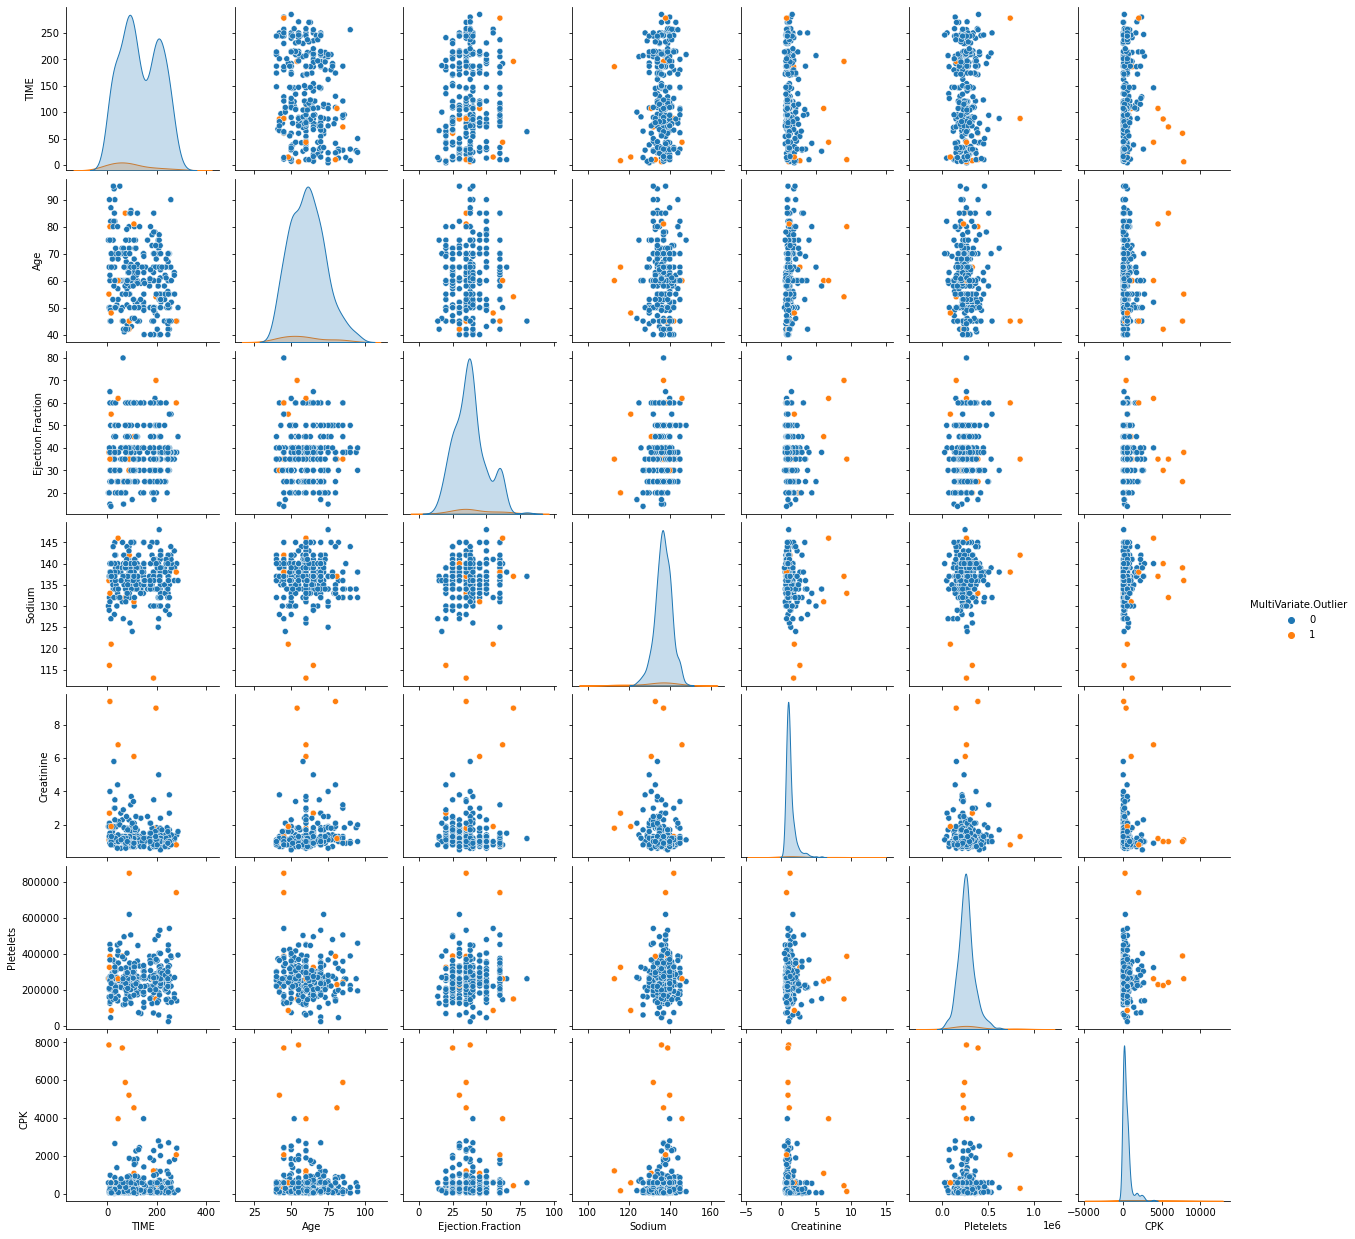

In [28]:
sns.pairplot(data=df_x[continuous_feature_list_copy], hue="MultiVariate.Outlier")

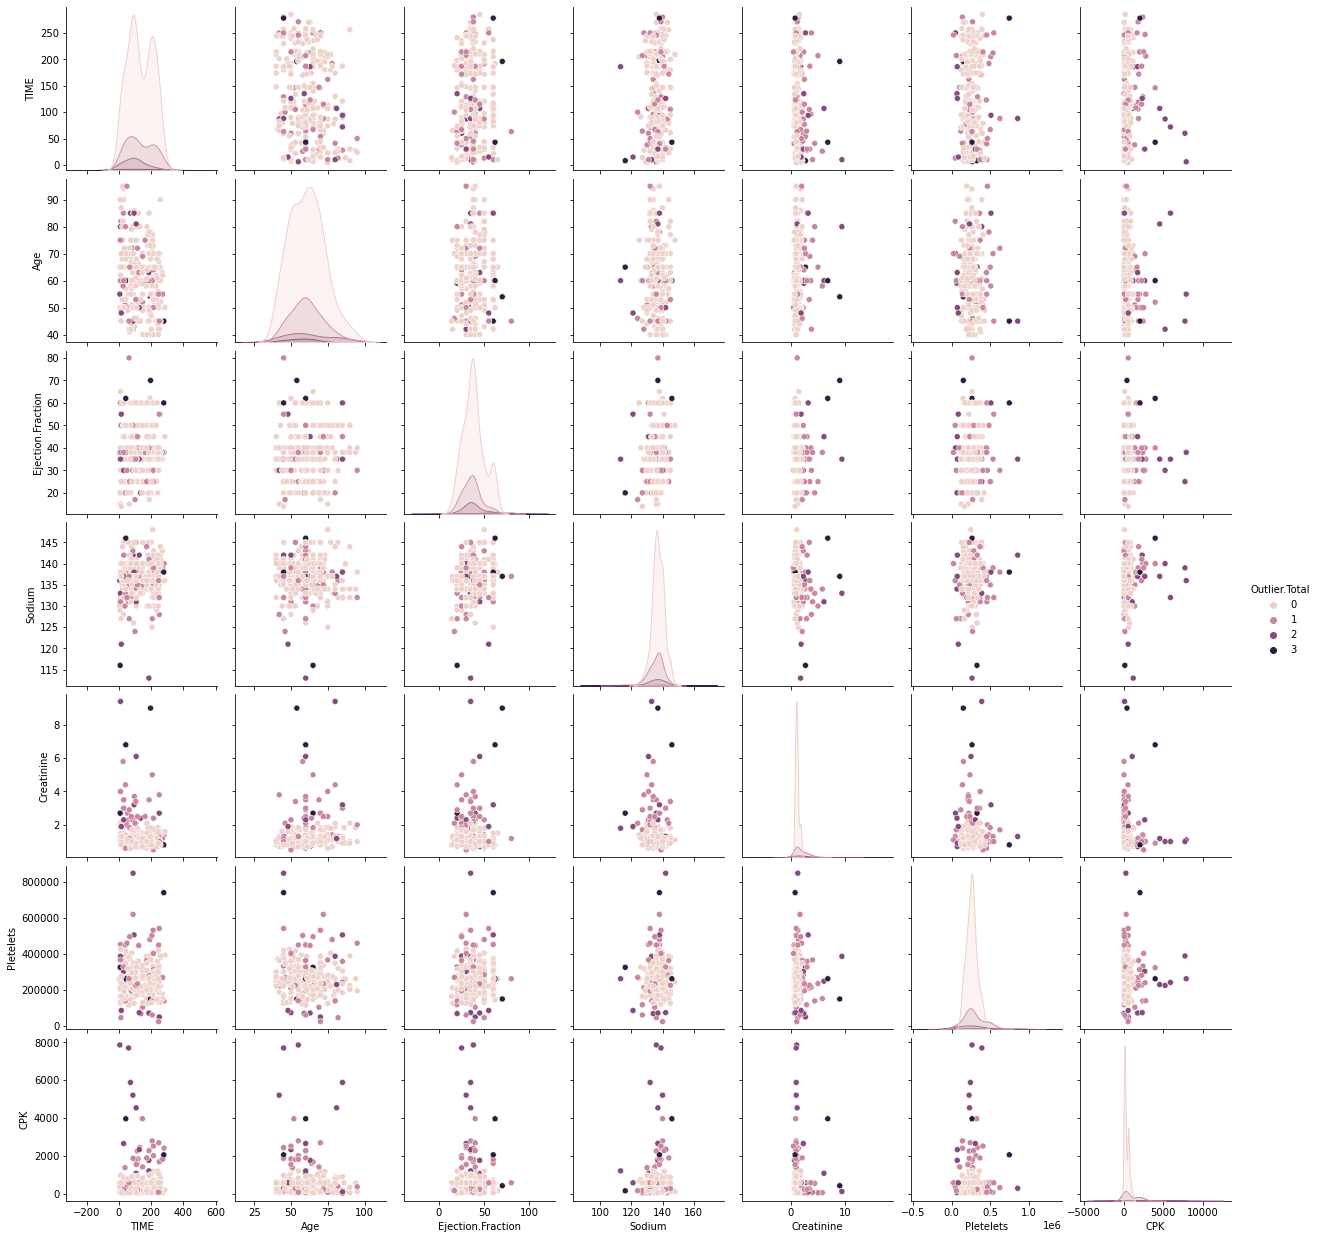

In [75]:
# continuous_feature_list.append('Outlier.Total')
sns.pairplot(data=df_x[continuous_feature_list], hue="Outlier.Total")

In [9]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [10]:
   
def get_metric(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import matthews_corrcoef

    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    TP_rate = TP/(TP+FN)
    TN_rate = TN/(TN+FP)
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    f1 = f1_score(y_test, y_pred)
    MCC = matthews_corrcoef(y_test, y_pred)
    return MCC, accuracy, f1, TP_rate, TN_rate
    
def save_default_model(name):
    import joblib
    joblib.dump(self.model, f'{name}.pkl')

def save_grid_model(name, type=0):
    import joblib
    if type == 0:
        joblib.dump(self.grid_search.best_estimator_, f'{name}.pkl')
    else:
        joblib.dump(self.grid_search, f'{name}.pkl')

In [4]:
from abc import ABC, abstractmethod
class GenearalSklearnClassifier(ABC):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.accuracy = 0
        self.TP_rate= 0
        self.TN_rate = 0
        self.MCC = 0
        self.f1 = 0
        
        self.accuracy_list_test = []
        self.TP_rate_list_test = []
        self.TN_rate_list_test = []
        self.f1_list_test = []
        self.MCC_list_test = []

    @abstractmethod
    def preprocessing_feature(self):
        pass
    
    @abstractmethod
    def visualize_parameter_effect(self):
        pass
    
    def train_model_default(self):
        from sklearn.model_selection import KFold
        from sklearn.model_selection import train_test_split
        count = 0
        
#         for i in range(20):
#             kf = KFold(n_splits=5, shuffle=True)
#             for train_index, test_index in kf.split(X):
#                 X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
#                 y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
#                 self.model.fit(X_train,y_train)
#                 y_pred = self.model.predict(X_test)
#                 MCC_test, accuracy_test, f1_test, TP_rate_test, TN_rate_test = get_metric(y_test, y_pred)

#                 self.accuracy_list_test.append(accuracy_test)
#                 self.f1_list_test.append(f1_test)
#                 self.TP_rate_list_test.append(TP_rate_test)
#                 self.TN_rate_list_test.append(TN_rate_test)
#                 self.MCC_list_test.append(MCC_test)
                
#                 count = count + 1
#                 print(count)

        for i in range(100):
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(self.X,self.y,test_size = 0.2, shuffle=True)
            self.model.fit(X_train,y_train)
            y_pred = self.model.predict(X_test)
            MCC_test, accuracy_test, f1_test, TP_rate_test, TN_rate_test = get_metric(y_test, y_pred)

            self.accuracy_list_test.append(accuracy_test)
            self.f1_list_test.append(f1_test)
            self.TP_rate_list_test.append(TP_rate_test)
            self.TN_rate_list_test.append(TN_rate_test)
            self.MCC_list_test.append(MCC_test)

            count = count + 1
            print(count)
            
        self.accuracy = sum(self.accuracy_list_test) / len(self.accuracy_list_test)
        self.f1 = sum(self.f1_list_test) / len(self.f1_list_test)
        self.TN_rate = sum(self.TN_rate_list_test) / len(self.TN_rate_list_test)
        self.TP_rate = sum(self.TP_rate_list_test) / len(self.TP_rate_list_test)
        self.MCC = sum(self.MCC_list_test) / len(self.MCC_list_test)
        
        print(f'MCC: {self.MCC} , accuracy: {self.accuracy} , f1: {self.f1}, TP_rate: {self.TP_rate} , TN_rate: {self.TN_rate}')
        print("Train success")
      
    def train_model_hyperparameter(self):
        from sklearn.metrics import make_scorer, matthews_corrcoef
#         from sklearn.ensemble import RandomForestClassifier
        from sklearn.model_selection import train_test_split
        from sklearn.model_selection import GridSearchCV
        
#         self.model=RandomForestClassifier(n_estimators=100)
        self.grid_search = GridSearchCV(estimator = self.model, 
                                        param_grid = self.param_grid, 
                                        scoring=make_scorer(matthews_corrcoef),
                                        return_train_score=True,
                                        cv = 5, n_jobs = -1, verbose = 2)
        
        X_train, X_test, y_train, y_test = train_test_split(self.X,self.y,test_size = 0.2, shuffle=True)
        self.grid_search.fit(X_train, y_train)
        y_pred = self.grid_search.predict(X_test)
        
        print(self.grid_search.best_params_) 
        MCC_test, accuracy_test, f1_test, TP_rate_test, TN_rate_test = get_metric(y_test, y_pred)
        print(f'MCC: {MCC_test} , accuracy: {accuracy_test} , f1: {f1_test}, TP_rate: {TP_rate_test} , TN_rate: {TN_rate_test}')
        print("Train success")


In [5]:
class RandomForest(GenearalSklearnClassifier):
    def __init__(self, X, y):
        super().__init__(X, y)
        from sklearn.ensemble import RandomForestClassifier
        self.model=RandomForestClassifier()
        self.param_grid = {
            'bootstrap': [True],
            'max_depth': [5, 7, 9, 11],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': np.arange(2,8,2),
            'n_estimators': np.arange(50,300,50)
        }
        
    def preprocessing_feature(self):
        print("")
        
    def visualize_parameter_effect(self):
        mean_test_score = self.grid_search.cv_results_['mean_test_score']
        mean_train_score = self.grid_search.cv_results_['mean_train_score']
        param_n_estimators = self.grid_search.cv_results_["param_n_estimators"]
        param_min_samples_split = self.grid_search.cv_results_["param_min_samples_split"]
        sns.lineplot(x=param_n_estimators, y=mean_test_score)
        sns.lineplot(x=param_n_estimators, y=mean_train_score)

In [11]:
RF = RandomForest(X, y)
RF.train_model_default()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
MCC: 0.6328411106435463 , accuracy: 0.8436666666666666 , f1: 0.7332391781024444, TP_rate: 0.7038119669087933 , TN_rate: 0.9113272337029382
Train success


In [150]:
RF.grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_bootstrap', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [136]:
RF = RandomForest(X, y)
RF.train_model_hyperparameter()

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'bootstrap': True, 'max_depth': 11, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 50}
MCC: 0.658702969519582 , accuracy: 0.85 , f1: 0.7692307692307692, TP_rate: 0.75 , TN_rate: 0.9
Train success


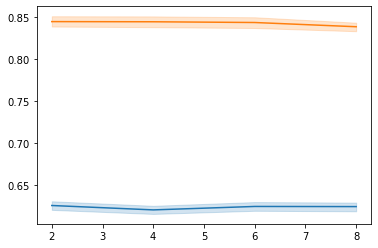

In [105]:
RF.visualize_parameter_effect()

In [142]:
class SVM(GenearalSklearnClassifier):
    def __init__(self, X, y):
        super().__init__(X, y)
        from sklearn.svm import SVC
        self.model = SVC()
        self.param_grid = {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
            'gamma': ['auto', 'scale']
        }
        
    def preprocessing_feature(self):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(self.X)
        self.X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
        return self.X
        
    def visualize_parameter_effect(self):
        mean_test_score = self.grid_search.cv_results_['mean_test_score']
        mean_train_score = self.grid_search.cv_results_['mean_train_score']
        param_C = self.grid_search.cv_results_["param_C"]
        param_kernel = self.grid_search.cv_results_["param_kernel"]
        sns.lineplot(x=param_C, y=mean_test_score)
        sns.lineplot(x=param_C, y=mean_train_score)
        

In [138]:
SVM_cls = SVM(X, y)
transformed = SVM_cls.preprocessing_feature()
SVM_cls.train_model_default()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
MCC: 0.5297024379181022 , accuracy: 0.8008107344632763 , f1: 0.6576875117570161, TP_rate: 0.6078031805000712 , TN_rate: 0.8940039285624011
Train success


In [146]:
SVM_cls = SVM(X, y)
transformed = SVM_cls.preprocessing_feature()
SVM_cls.train_model_hyperparameter()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'C': 0.05, 'gamma': 'auto', 'kernel': 'linear'}
MCC: 0.5178087050187165 , accuracy: 0.8166666666666667 , f1: 0.6206896551724139, TP_rate: 0.5294117647058824 , TN_rate: 0.9302325581395349
Train success


In [149]:
SVM_cls.grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [151]:
class GradientBoosting(GenearalSklearnClassifier):
    def __init__(self, X, y):
        super().__init__(X, y)
        from sklearn.ensemble import GradientBoostingClassifier
        self.model = GradientBoostingClassifier()
        self.param_grid = {
            "learning_rate":[0.01,0.1,1,10,100],
            'max_depth': [5, 7, 9, 11],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [2, 4, 6, 8],
            'n_estimators': np.arange(50,300,50)
        }
        
    def preprocessing_feature(self):
        print("")
        
    def visualize_parameter_effect(self):
        mean_test_score = self.grid_search.cv_results_['mean_test_score']
        mean_train_score = self.grid_search.cv_results_['mean_train_score']
        param_n_estimators = self.grid_search.cv_results_["param_n_estimators"]
        param_min_samples_split = self.grid_search.cv_results_["param_min_samples_split"]
        sns.lineplot(x=param_min_samples_split, y=mean_test_score)
        sns.lineplot(x=param_min_samples_split, y=mean_train_score)

In [152]:
XGB = GradientBoosting(X, y)
XGB.train_model_default()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
MCC: 0.5971289490829096 , accuracy: 0.824971751412429 , f1: 0.7174978392750144, TP_rate: 0.7100548561425074 , TN_rate: 0.8818838126297481
Train success


In [154]:
import torch
import torch.nn as nn
torch.cuda.is_available()

True

In [161]:
from sklearn.model_selection import train_test_split
X_NN = np.array(X)
y_NN = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_NN, y_NN, test_size=0.2, random_state=1)
rate = 0.25
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=rate, random_state=1) 

from torch.utils.data import DataLoader, TensorDataset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

batch_size = 5
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [165]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_dim1, output_size, p_drop):
        super(NeuralNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_dim1 = hidden_dim1
        self.output_size = output_size
        self.p_drop = p_drop
        
        self.fc1 = nn.Linear(input_size, hidden_dim1)
        self.out_layer = nn.Linear(hidden_dim1, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p_drop)
        self.batchnorm1 = nn.BatchNorm1d(hidden_dim1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, batch_size):
        out = self.relu(self.fc1(x))
        out = self.batchnorm1(out)
        self.dropout(out)
        out = self.out_layer(out)
        
        return out 

In [166]:
NN = NeuralNetwork(len(X.columns), 100, 1, 0.3)
NN

NeuralNetwork(
  (fc1): Linear(in_features=12, out_features=100, bias=True)
  (out_layer): Linear(in_features=100, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (batchnorm1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
)

In [163]:
def train(nn_model, criterion, optimizer):
    NN.train()
    epoch_loss_train = 0
    for x, y in train_loader:
        if(torch.cuda.is_available()):
            x = x.cuda()
            y = y.cuda()
        NN.zero_grad()
        pred = NN(x.float(), 3)
        loss = criterion(pred, y.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        epoch_loss_train = epoch_loss_train + loss.item()
    
    average_loss = epoch_loss_train/len(train_loader)
    return average_loss

12

In [ ]:
epochs = 100
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=params["lr"])
check = 0
loss_training =[]
acc_arr = []
epoch_arr = []

for epoch in range(epochs):
    train_loss = train(nn_model, criterion, optimizer)
#         acc = test(nn_model, criterion)

    print(f'epoch: {epoch+ 1}/{epochs}, train_loss: {train_loss}')
    epoch_arr.append(epoch)
    loss_training.append(train_loss)

In [ ]:
from optuna.trial import Trial
def main_train(trial):
    params = {
        "lr": trial.suggest_loguniform("lr", 1e-4, 1e-2),
        "p_drop": trial.suggest_uniform("p_drop", 0.3, 0.5),
        "hidden_dim1": trial.suggest_int("hidden_dim1", 100, 300, 50),
    }
    
    nn_model = NN(input_size,params["hidden_dim1"],1, params["p_drop"])
#     nn_model = NN(input_size,64,64,1, params["p_drop"])
    if(torch.cuda.is_available()):
        nn_model = nn_model.cuda()

    epochs = 100
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(nn_model.parameters(), lr=params["lr"])
    check = 0
    loss_training =[]
    acc_arr = []
    epoch_arr = []
    
    for epoch in range(epochs):
        train_loss = train(nn_model, criterion, optimizer)
#         acc = test(nn_model, criterion)
        
        print(f'epoch: {epoch+ 1}/{epochs}, train_loss: {train_loss}')
        epoch_arr.append(epoch)
        loss_training.append(train_loss)
    